# Define the Problem

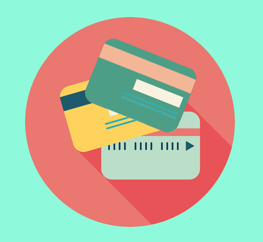

## Customer Segmentation

In [ ]:
Segment whole dataset
Segment Only the Churn Customers

In [ ]:
Why:
Business Need:

## Churn Rate Prediction

In [ ]:
Why:
Business Need:

In [22]:
from collections import Counter
from scipy import stats

import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import imblearn

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('tableau-colorblind10')
import seaborn as sns
from plotnine import *
import plotly.graph_objects as go
import plotly.express as px
import missingno as mno

# EDA

## Browse the data

In [161]:
df = pd.read_csv("BankChurners.csv")

In [24]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<AxesSubplot: >

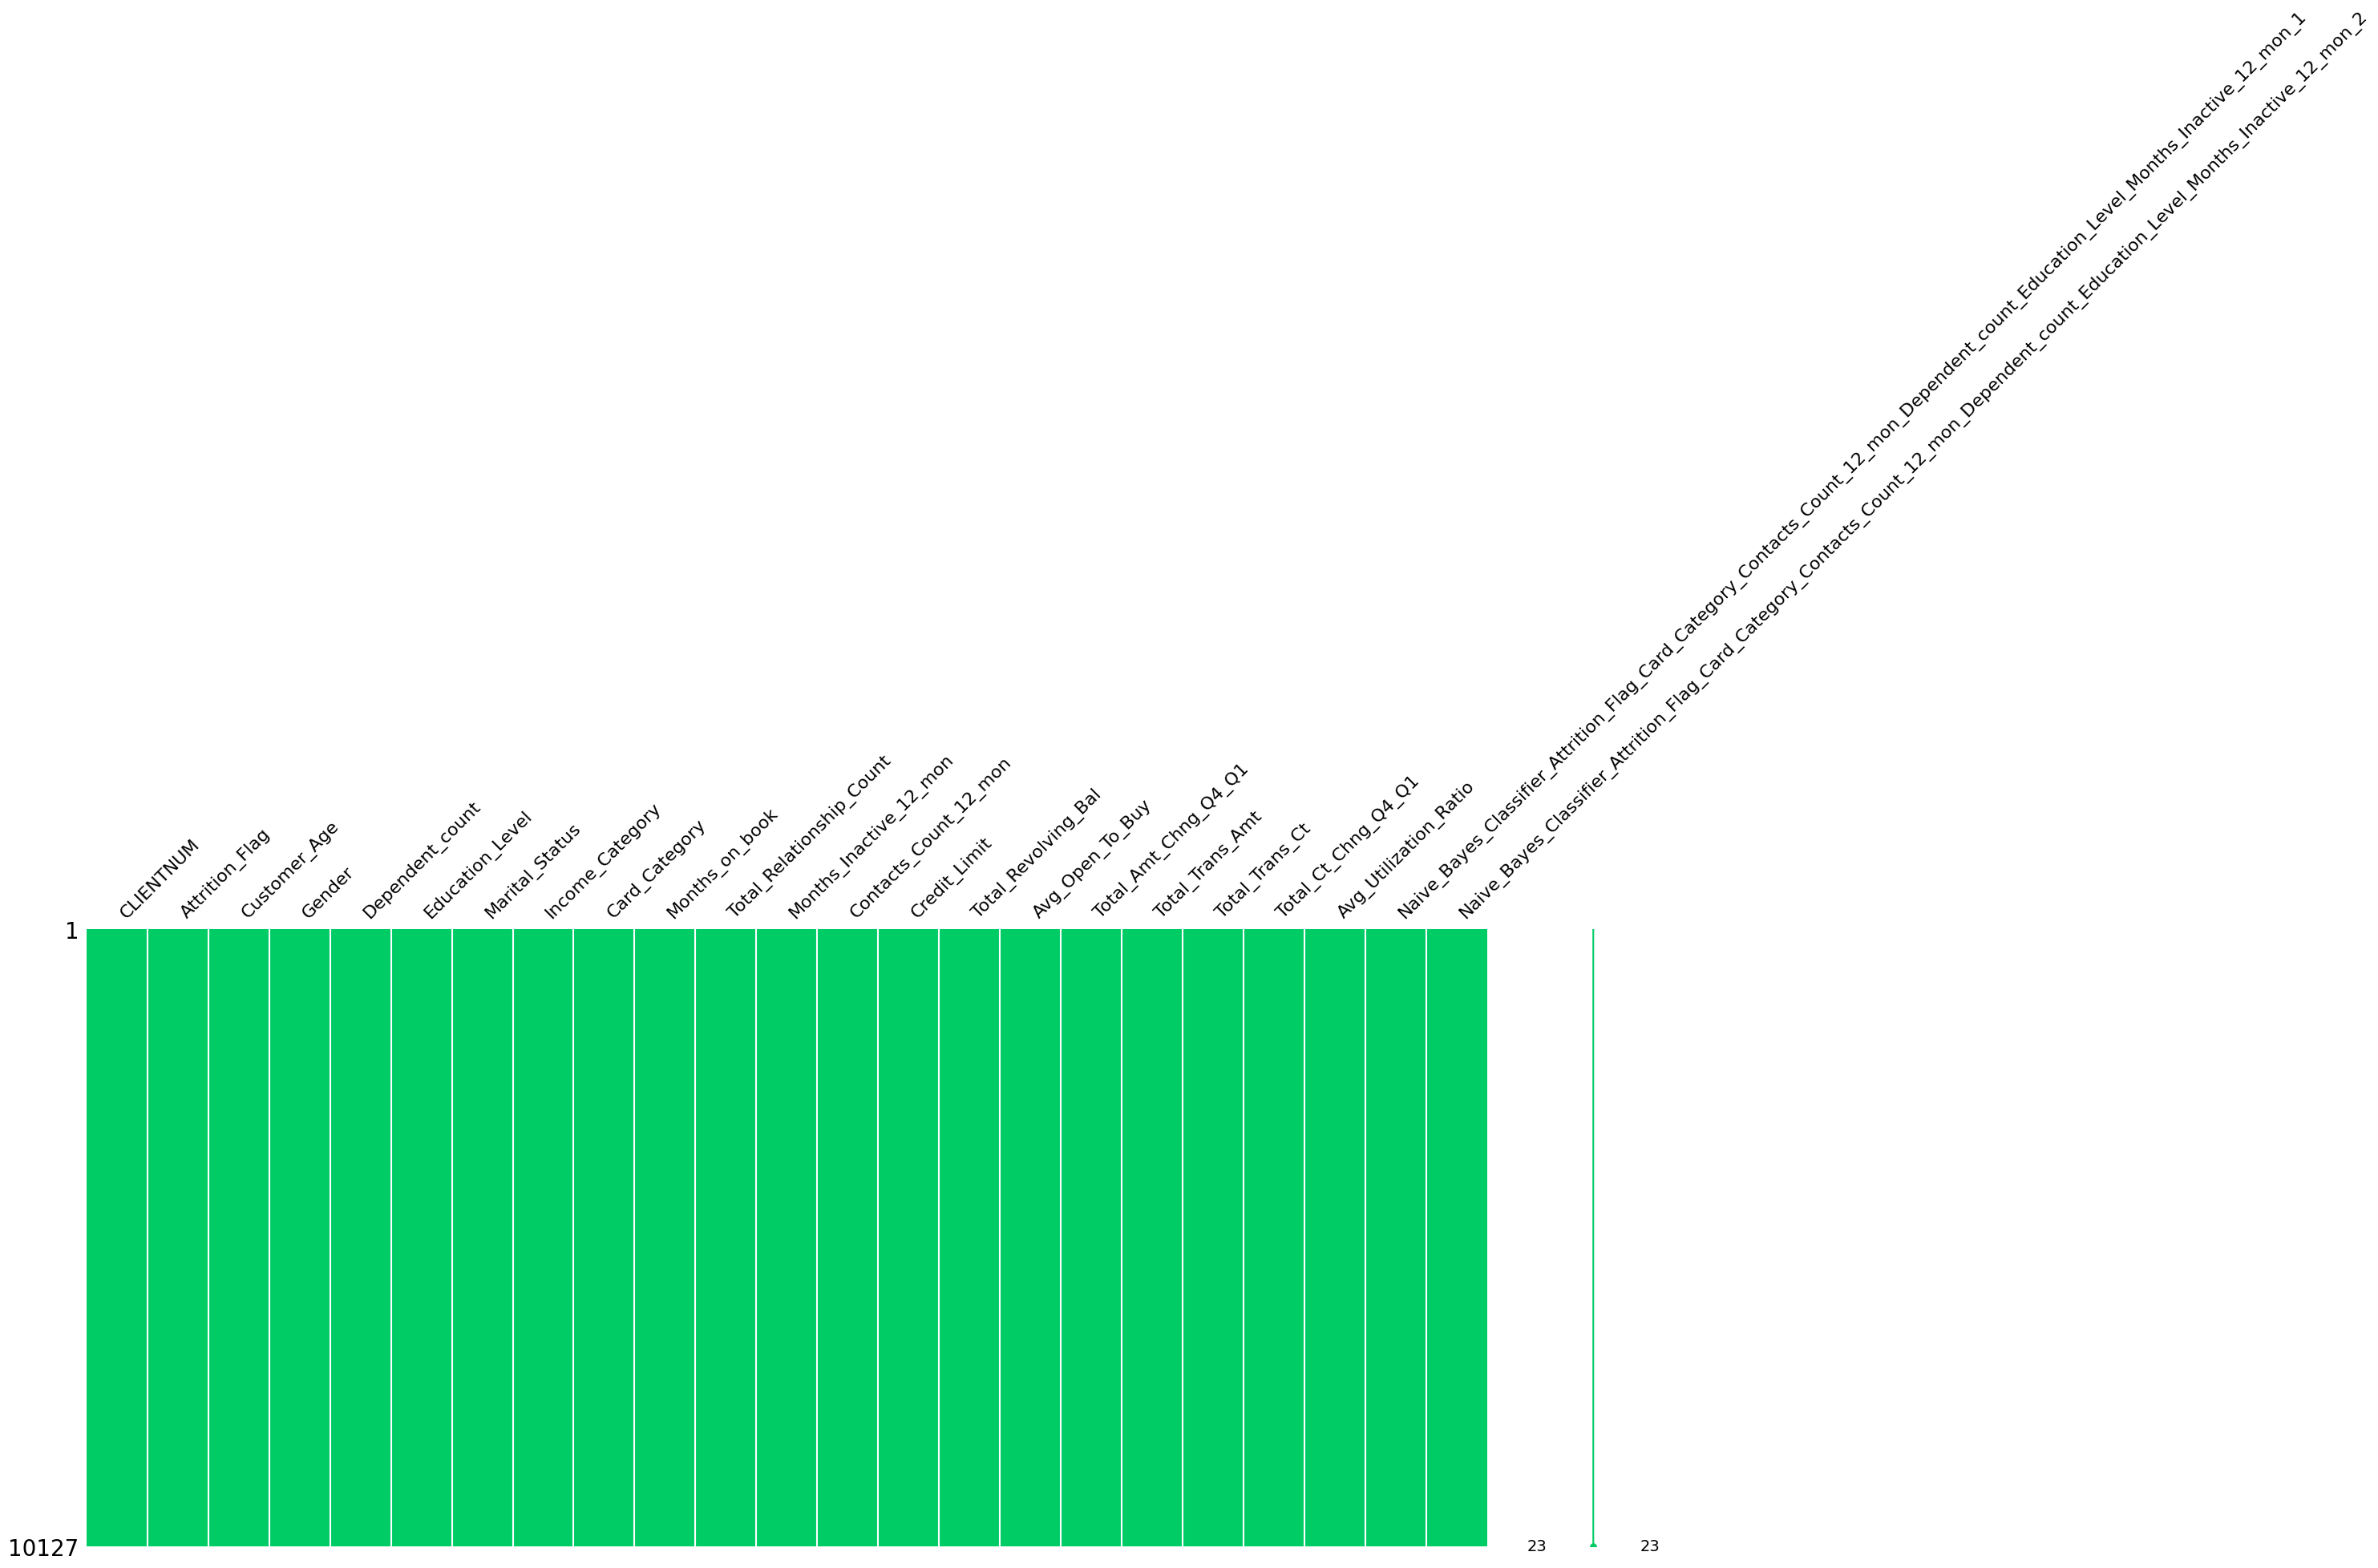

In [25]:
#Visualize the missing values in the dataframe! 
mno.matrix(df , color=(0, 0.8, 0.4),)

In [26]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [27]:
#Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# clf = GaussianNB()
# X_train = ... # feature matrix for training data
# y_train = ... # labels for training data
# clf.fit(X_train, y_train)

# X_test = ... # feature matrix for test data
# y_pred = clf.predict(X_test)

## columns

In [29]:
# drop columns
df = df.drop(columns = ['CLIENTNUM', 
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<AxesSubplot: >

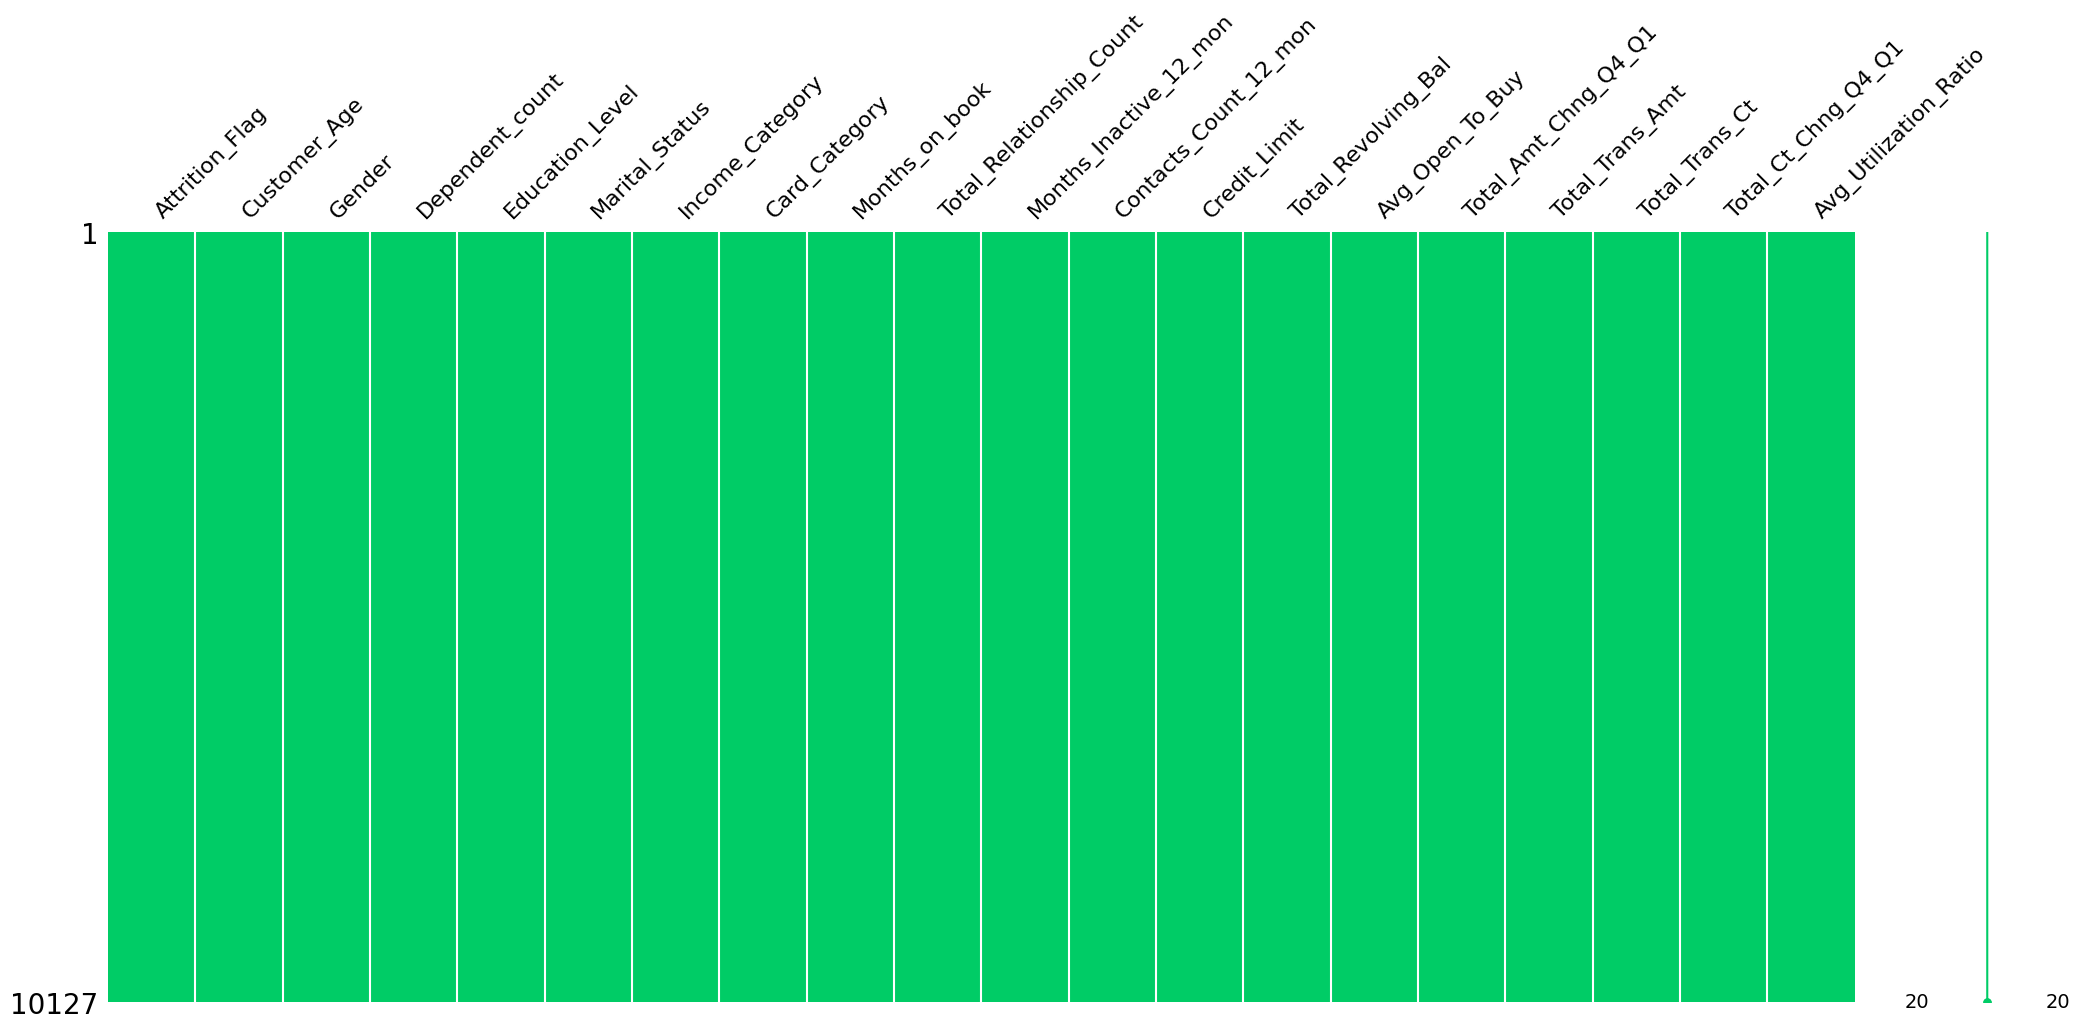

In [30]:
mno.matrix(df , color=(0, 0.8, 0.4),)

No missing data from this figure, Let's dig deeper. 

In [31]:
# Data Distribution + Sample Selection

cat_col = [x for x in df.columns if df[x].dtype == 'O']
num_col = [x for x in df.columns if x not in cat_col]

print('cat_col : {} \n\
num_col : {}'.format(len(cat_col), len(num_col)))

cat_col : 6 
num_col : 14


In [32]:
# import matplotlib
# print(matplotlib.__version__)

### catgorical columns: 6

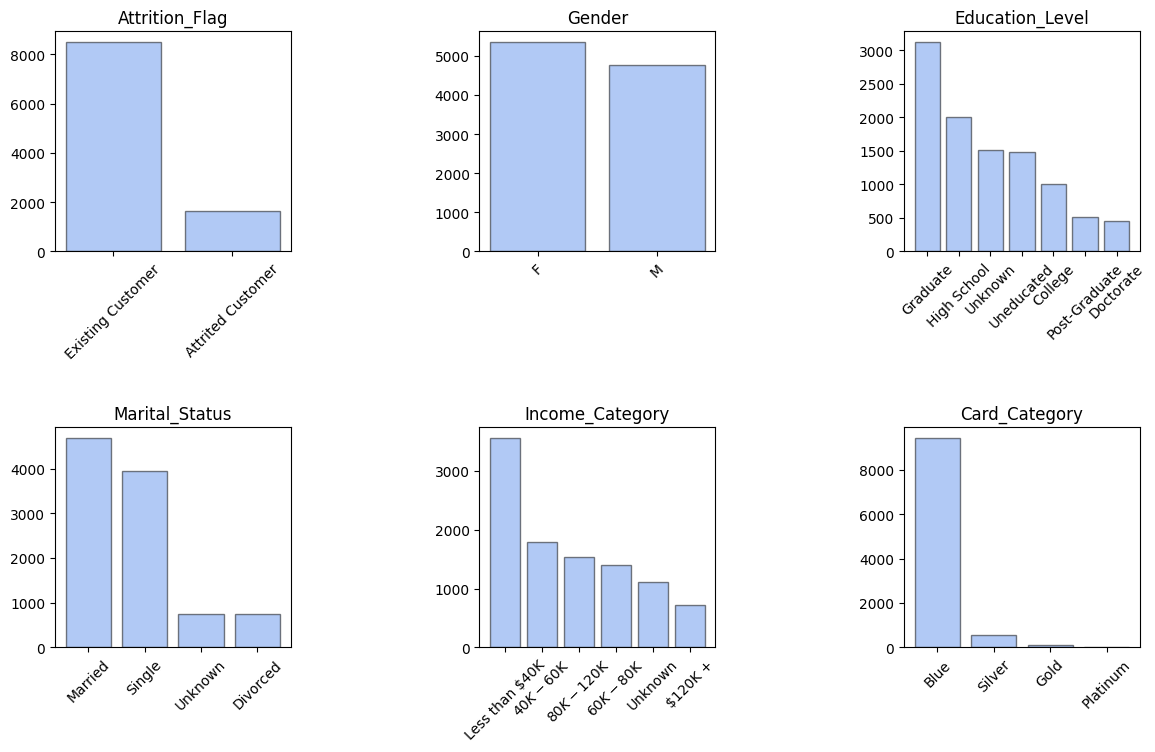

In [85]:
fig = plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i,var in enumerate(cat_col):
    tmp = df[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(tmp['index'], tmp[var], edgecolor='k',linewidth=1, alpha=0.5, color='cornflowerblue', linestyle='solid')
#FixedFormatter should only be used together with FixedLocator
    ax.set_xticks([i for i in range(len(tmp['index']))])
    ax.set_title(var)
    ax.set_xticklabels(tmp['index'], rotation=45)


We have unknown in education, marital, income

In [34]:
unknown_EDU = len(df.loc[df['Education_Level'] == 'Unknown'])
unknown_Marry = len(df.loc[df['Marital_Status'] == 'Unknown'])
unknown_Income = len(df.loc[df['Income_Category'] == 'Unknown']) 

edu_d = df['Education_Level'].value_counts().to_dict()
marry_d = df['Marital_Status'].value_counts().to_dict()
income_d = df['Income_Category'].value_counts().to_dict()

Text(0.5, 1.0, 'Income')

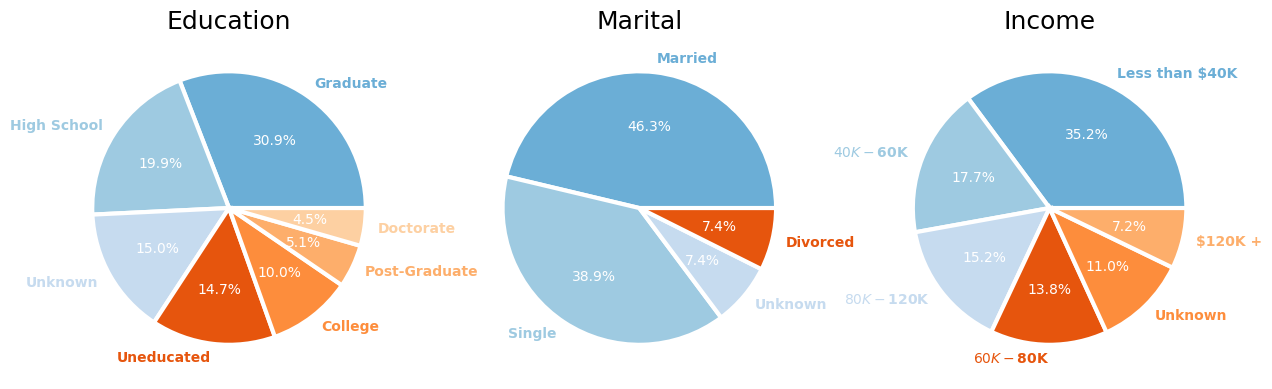

In [35]:
edu = list(edu_d.values())
marry = list(marry_d.values())
income = list(income_d.values())
label1 = list(edu_d.keys())
label2 = list(marry_d.keys())
label3 = list(income_d.keys())

cmap = plt.get_cmap("tab20c")
ar = np.concatenate((np.arange(1,10), [13,15,17,19], [25,30]))
outer_colors = cmap(np.array([0, 10, 20]))
inner_colors = cmap(ar)

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))


patches, texts, pcts = ax[0].pie(
    edu, labels = label1, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    colors = inner_colors
   
    )
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax[0].set_title('Education', fontsize=18)



patches, texts, pcts = ax[1].pie(
    marry, labels = label2, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    colors = inner_colors
   
    )
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax[1].set_title('Marital', fontsize=18)



patches, texts, pcts = ax[2].pie(
    income, labels = label3, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    colors = inner_colors
   
    )
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax[2].set_title('Income', fontsize=18)







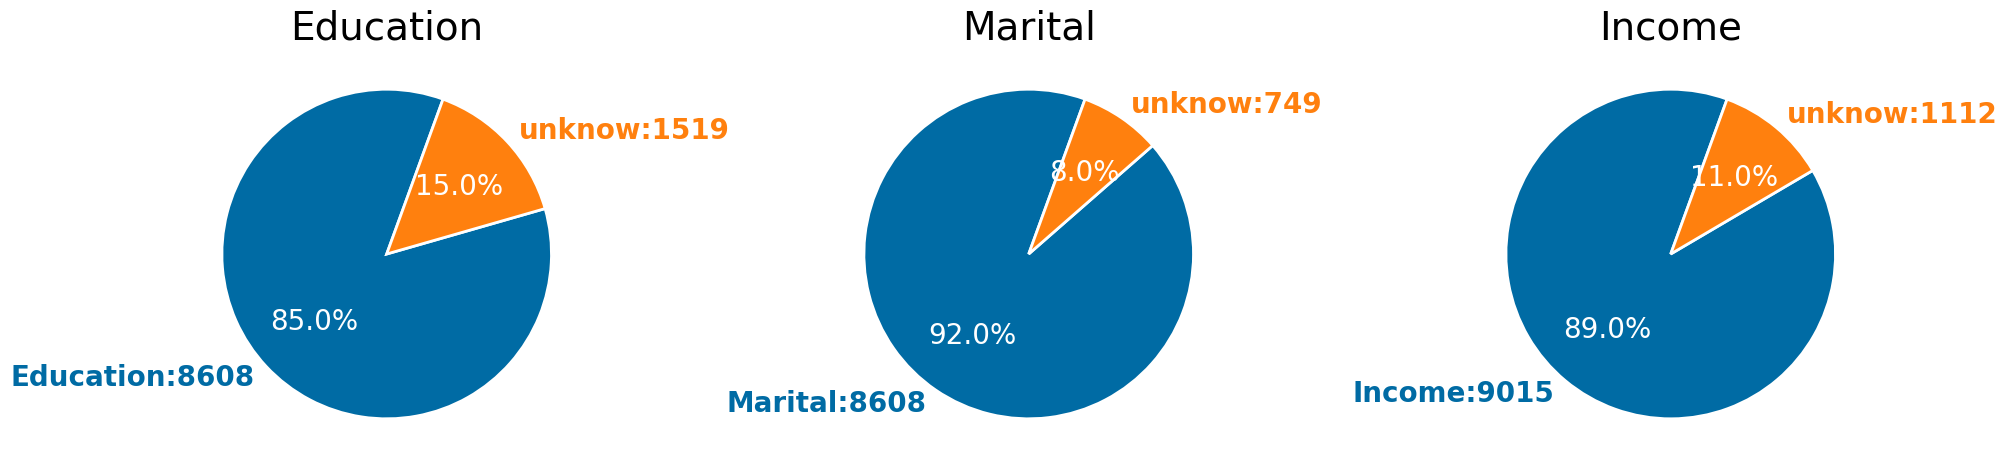

In [75]:
Edu = [len(df) - unknown_EDU,unknown_EDU]
label1 = ['Education:'f'{len(df) - unknown_EDU}','unknow:'f'{unknown_EDU}']

Marry = [len(df) - unknown_EDU,unknown_Marry]
label2 = ['Marital:'f'{len(df) - unknown_EDU}','unknow:'f'{unknown_Marry}']

Income = [len(df) - unknown_Income,unknown_Income]
label3 = ['Income:'f'{len(df) - unknown_Income}','unknow:'f'{unknown_Income}']

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20, 15))

patches, texts, pcts = ax[0].pie(
    Edu, labels=label1, autopct='%.1f%%',
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 20},
    startangle=70)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax[0].set_title('Education', fontsize=28)


patches, texts, pcts = ax[1].pie(
    Marry, labels=label2, autopct='%.1f%%',
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 20},
    startangle=70)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax[1].set_title('Marital', fontsize=28)


patches, texts, pcts = ax[2].pie(
    Income, labels=label3, autopct='%.1f%%',
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 20},
    startangle=70)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax[2].set_title('Income', fontsize=28)


plt.tight_layout()

### numerical columns: 14

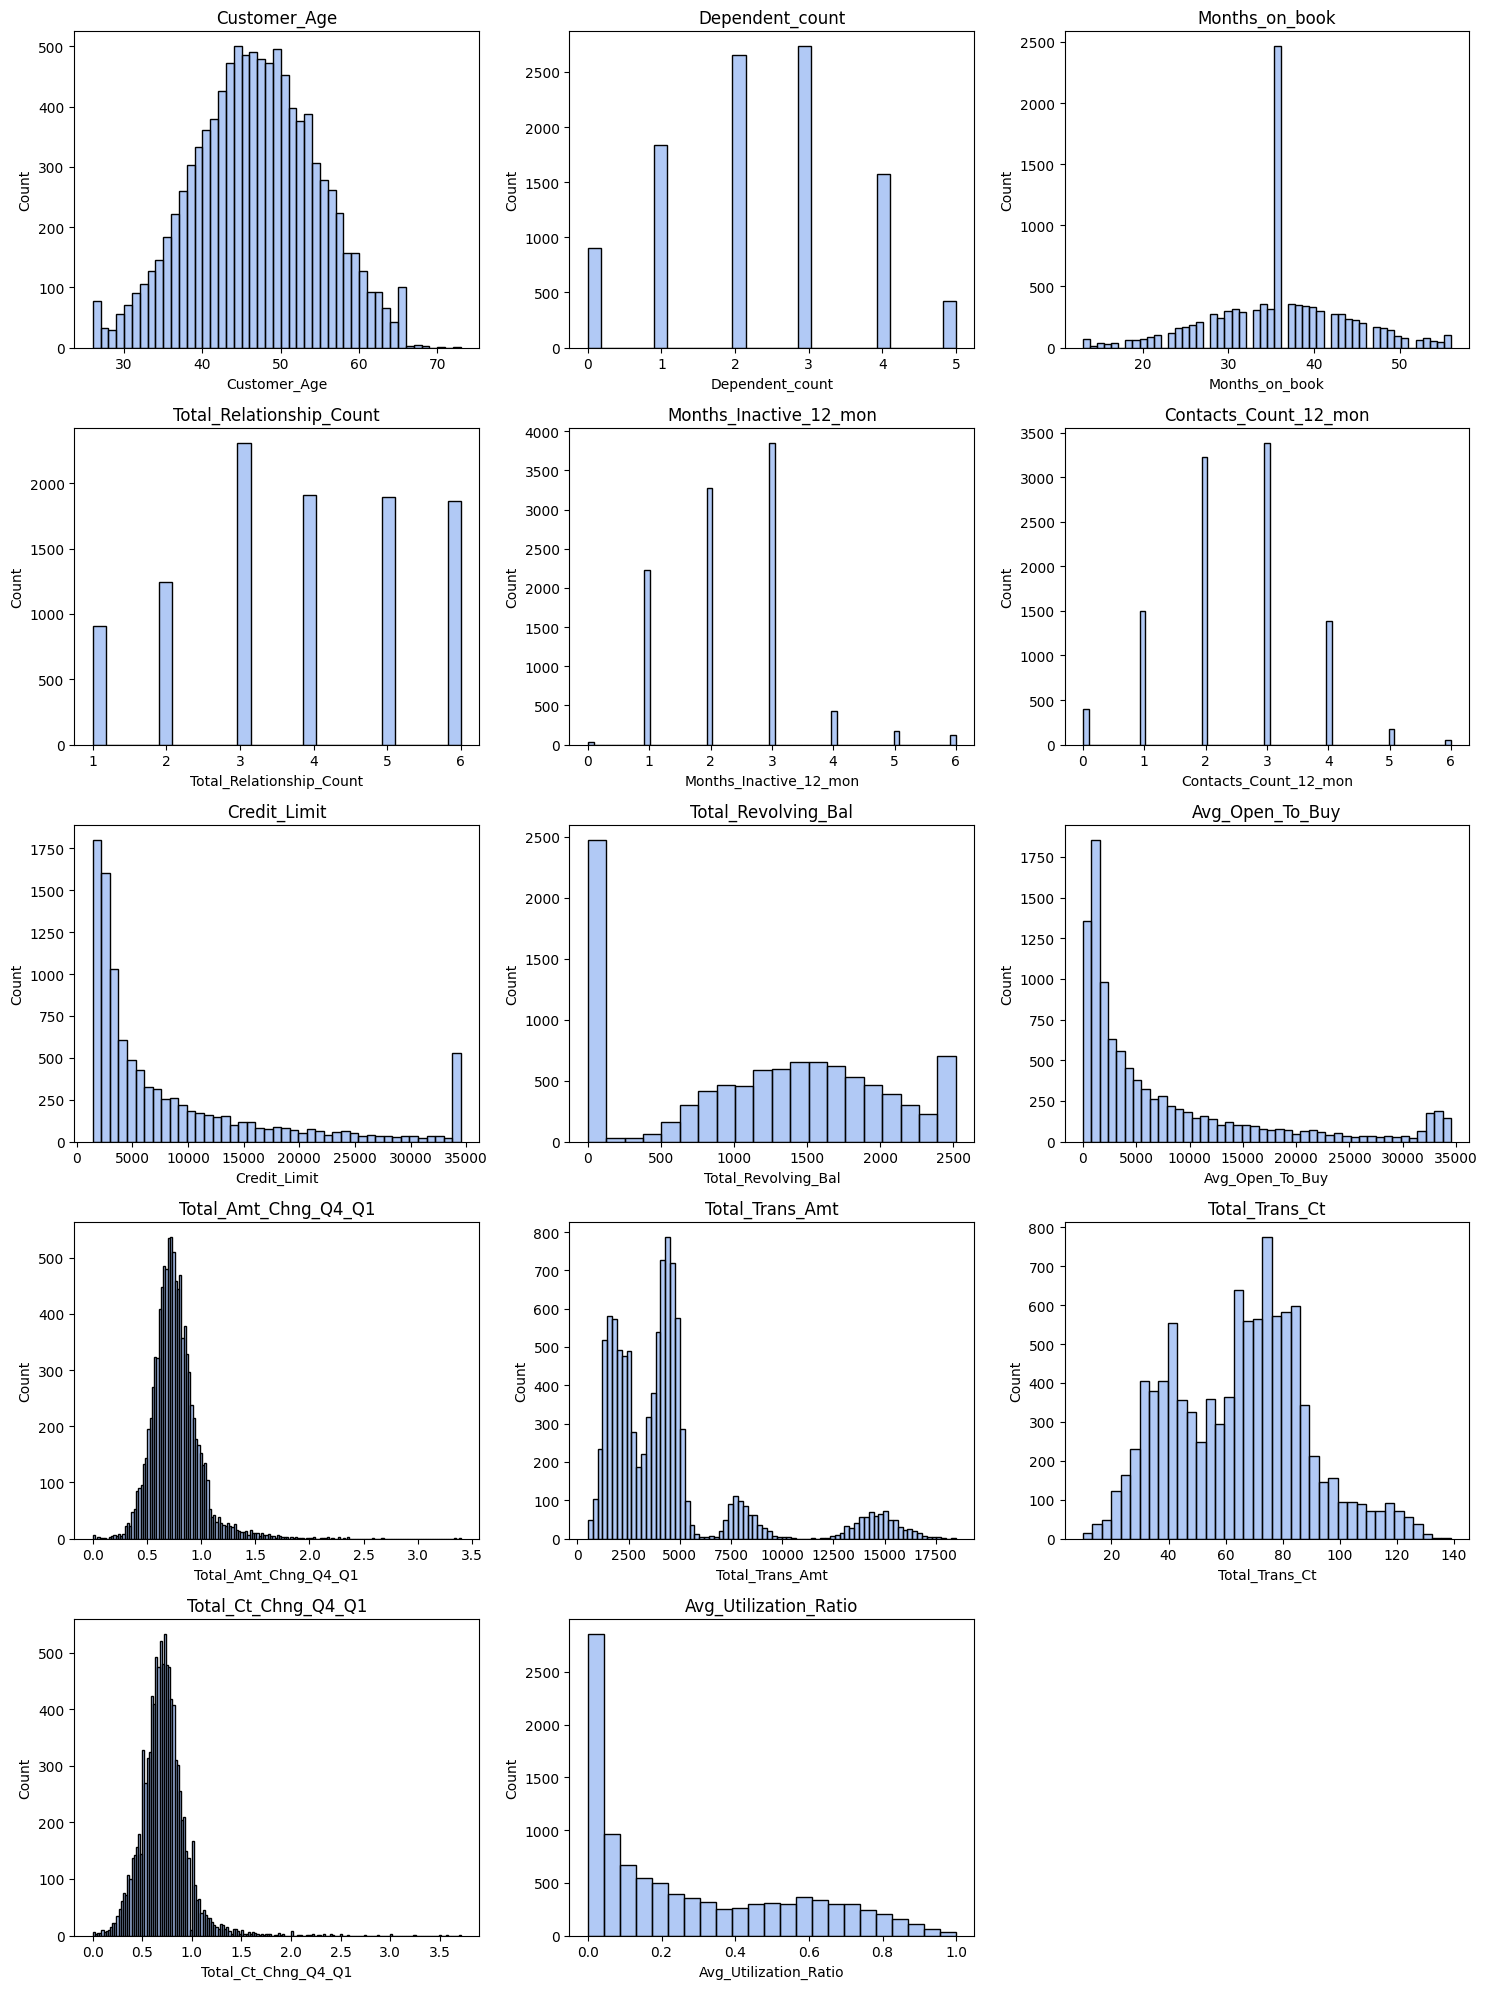

In [140]:
fig = plt.figure(figsize= (15,20))

for i,var in enumerate(num_col):
    ax = fig.add_subplot(5,3, i+1)
    sns.histplot(data = df, x = df[var], edgecolor='k',linewidth=1, alpha=0.5, color='cornflowerblue', linestyle='solid' )
    ax.set_title(var)
plt.tight_layout()

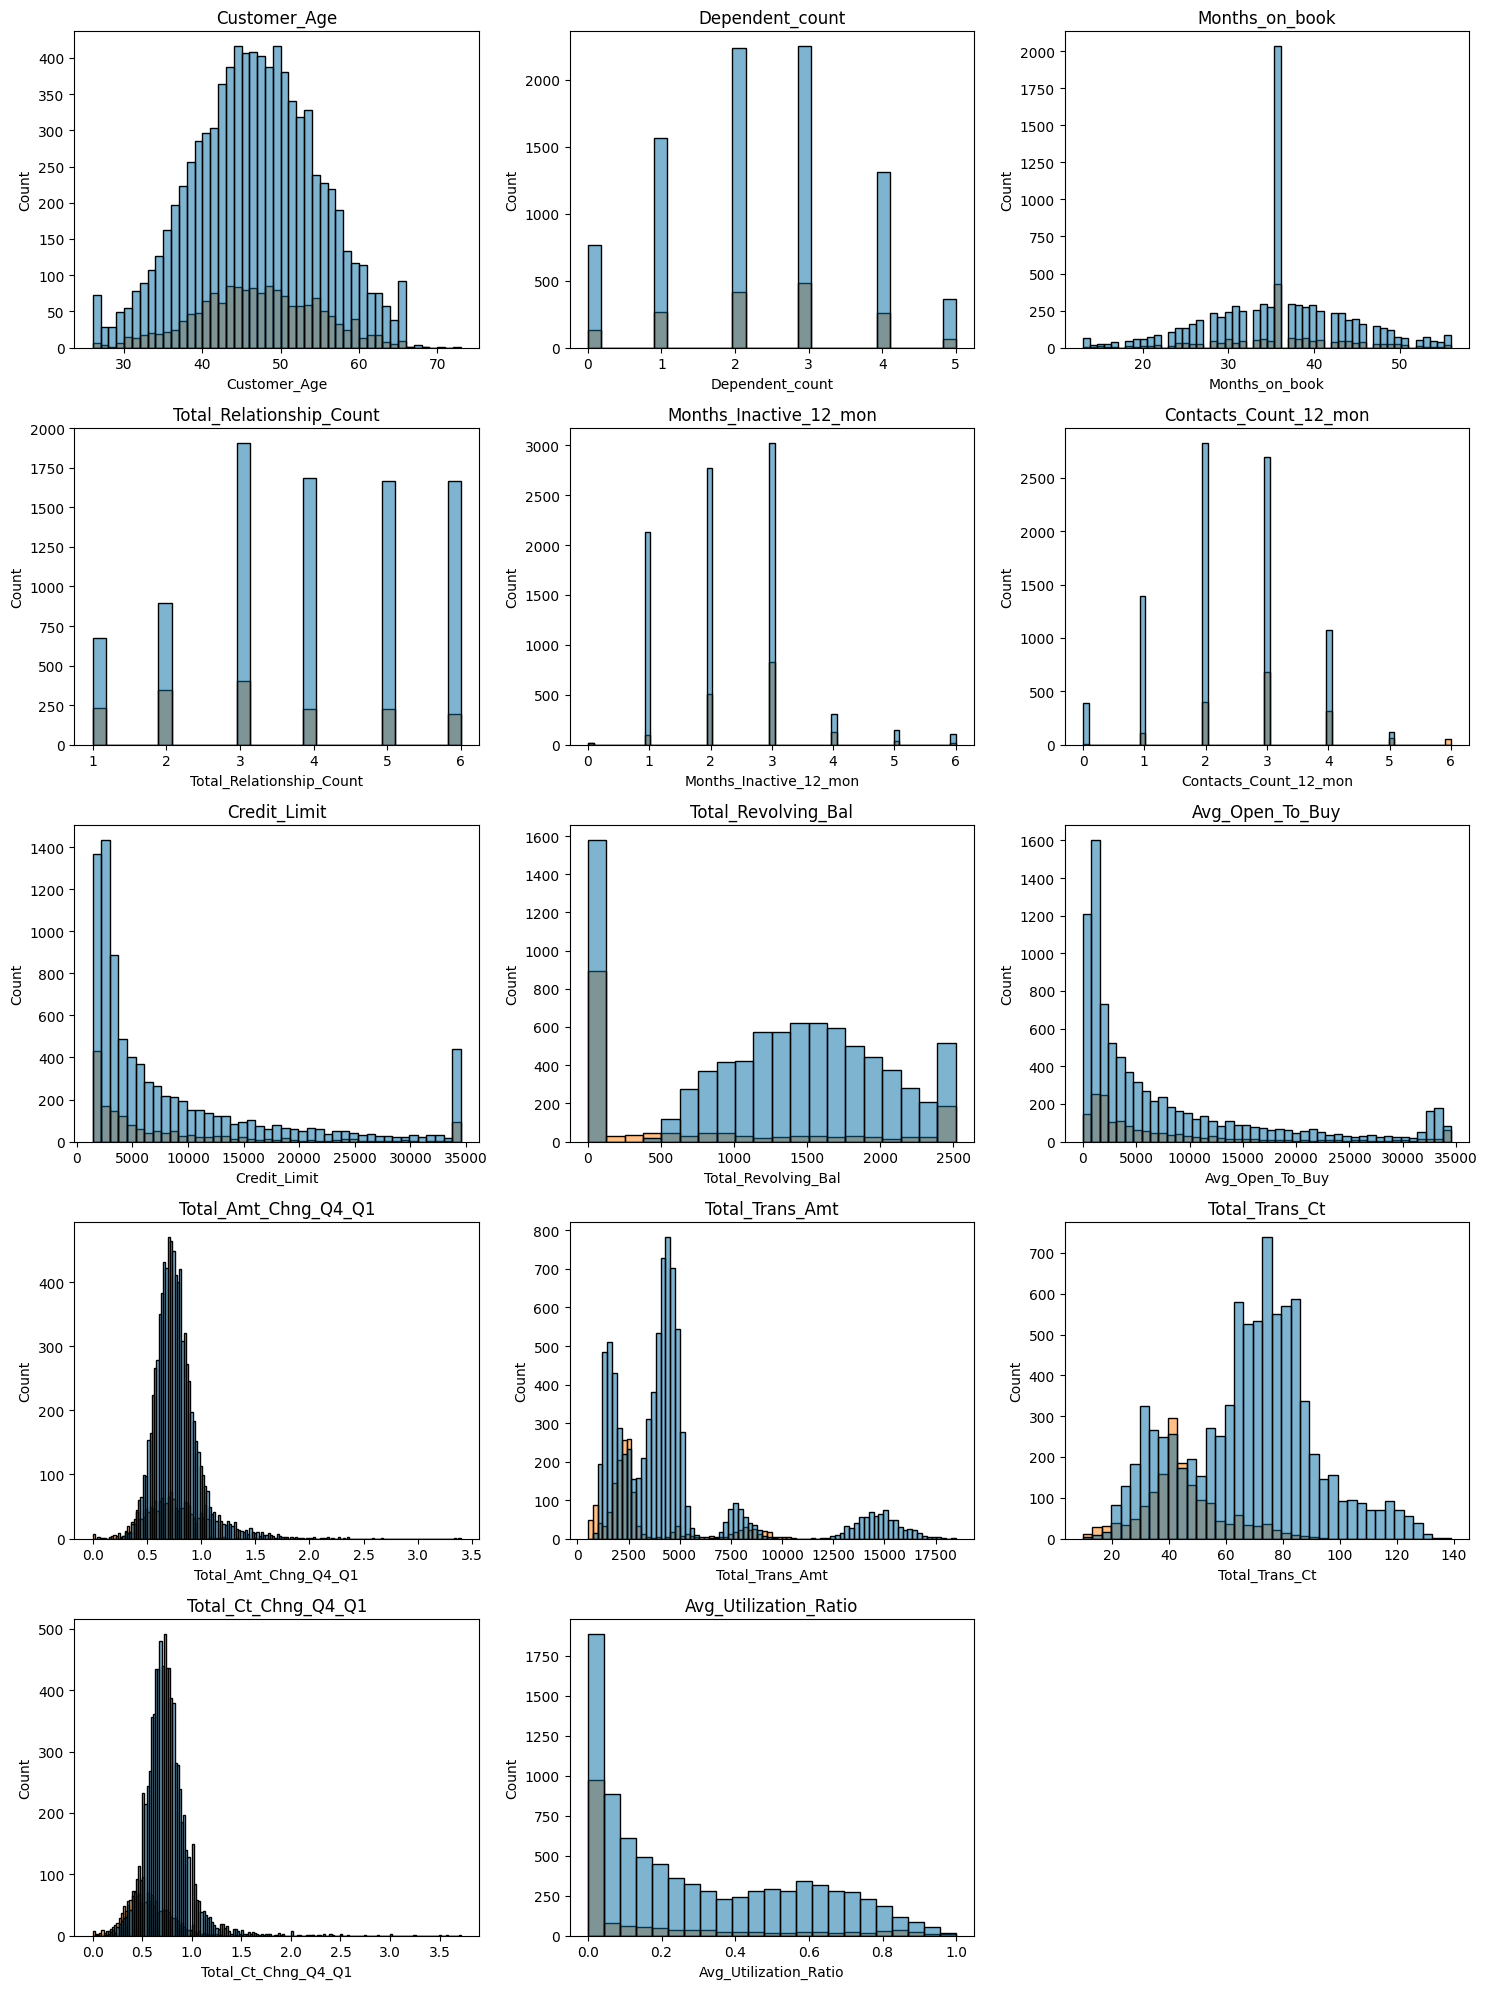

In [120]:
fig = plt.figure(figsize= (15,20))

for i,var in enumerate(num_col):
    ax = fig.add_subplot(5,3, i+1)
    sns.histplot(data = df, x = df[var], edgecolor='k',linewidth=1,linestyle='solid', hue = "Attrition_Flag", legend =False, )
    ax.set_title(var)
plt.tight_layout()

In [ ]:
Total_Relationship_Count

In [ ]:
sns.histplot(data=df, x="Total_Relationship_Count", hue="Attrition_Flag", color = 'r',palette=['red', 'blue', ])

<AxesSubplot: xlabel='Total_Relationship_Count', ylabel='Count'>

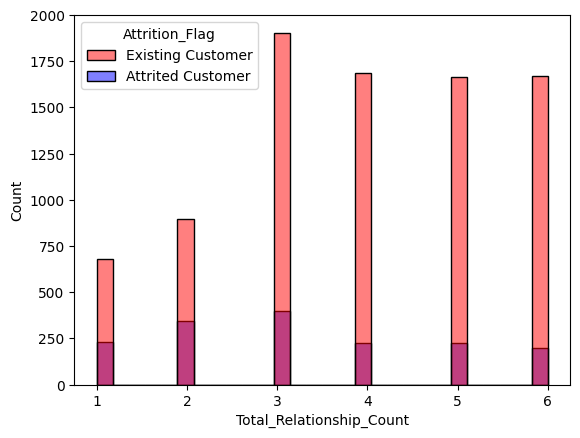

In [121]:
sns.histplot(data=df, x="Total_Relationship_Count", hue="Attrition_Flag", color = 'r',palette=['red', 'blue', ])

In [ ]:
Months_on_book

In [ ]:
Total_Amt_Chng_Q4_Q1

<AxesSubplot: xlabel='Avg_Utilization_Ratio', ylabel='Count'>

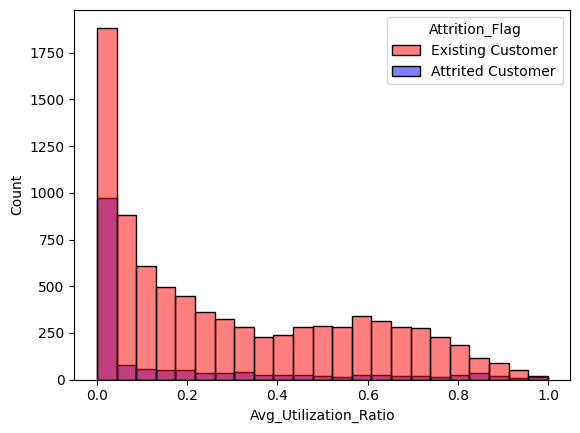

In [138]:
sns.histplot(data=df, x="Avg_Utilization_Ratio", hue="Attrition_Flag", color = 'r',palette=['red', 'blue', ])

<AxesSubplot: xlabel='Total_Revolving_Bal', ylabel='Count'>

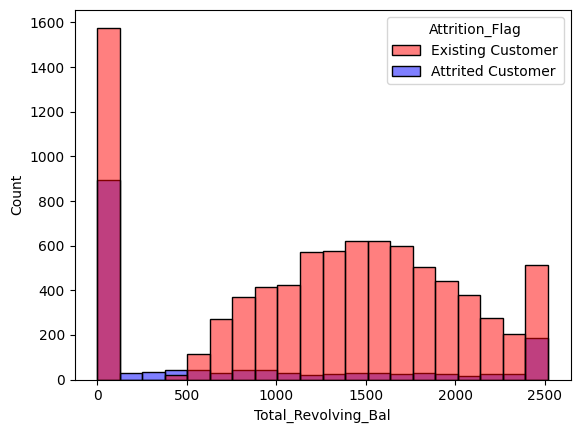

In [139]:
sns.histplot(data=df, x="Total_Revolving_Bal", hue="Attrition_Flag", color = 'r',palette=['red', 'blue', ])

In [126]:
df.loc[:,['Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,777,11914.0,1.335,1144,42,1.625,0.061
1,864,7392.0,1.541,1291,33,3.714,0.105
2,0,3418.0,2.594,1887,20,2.333,0.000
3,2517,796.0,1.405,1171,20,2.333,0.760
4,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...
10122,1851,2152.0,0.703,15476,117,0.857,0.462
10123,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,5281.0,0.535,8395,62,0.722,0.000


In [134]:
df.loc[:,['Total_Revolving_Bal','Credit_Limit','Avg_Utilization_Ratio']]

,Total_Revolving_Bal,Credit_Limit,Avg_Utilization_Ratio
0,777,12691.0,0.061
1,864,8256.0,0.105
2,0,3418.0,0.000
3,2517,3313.0,0.760
4,0,4716.0,0.000
...,...,...,...
10122,1851,4003.0,0.462
10123,2186,4277.0,0.511
10124,0,5409.0,0.000
10125,0,5281.0,0.000


In [ ]:
13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Open_To_Buy           10127 non-null  float64

0 utilize mean no revolving balance, that's good customer???
but their churn rate is high!!!

In [141]:
df_0_utilize = df[df['Avg_Utilization_Ratio'] == 0]

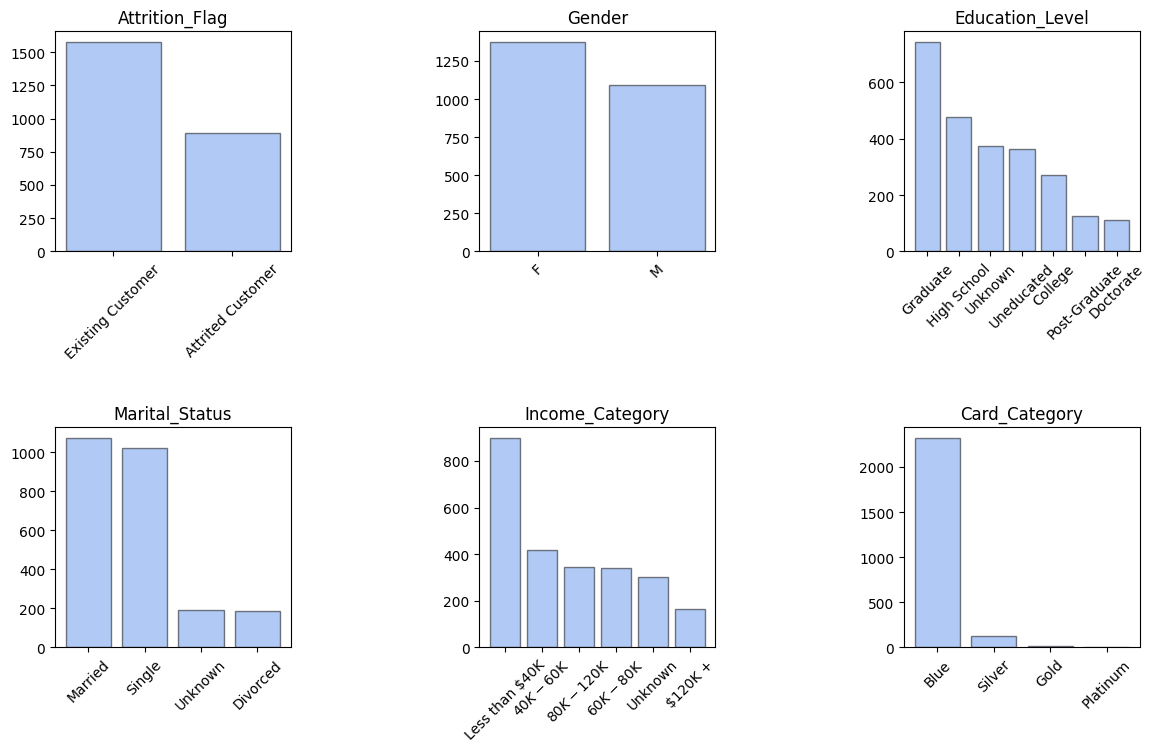

In [142]:
fig = plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i,var in enumerate(cat_col):
    tmp = df_0_utilize[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(tmp['index'], tmp[var], edgecolor='k',linewidth=1, alpha=0.5, color='cornflowerblue', linestyle='solid')
#FixedFormatter should only be used together with FixedLocator
    ax.set_xticks([i for i in range(len(tmp['index']))])
    ax.set_title(var)
    ax.set_xticklabels(tmp['index'], rotation=45)


In [148]:
df1 = pd.read_csv("BankChurners.csv")

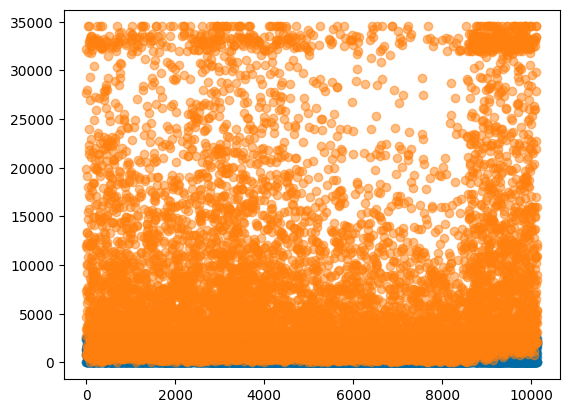

In [158]:

y1 = df['Total_Revolving_Bal']
y2 = df['Avg_Open_To_Buy']

plt.scatter(df.index,df['Total_Revolving_Bal'],alpha = 0.5)
plt.scatter(df.index,df['Avg_Open_To_Buy'],alpha = 0.5)


In [159]:
df.sort_values('Avg_Open_To_Buy', inplace=True)

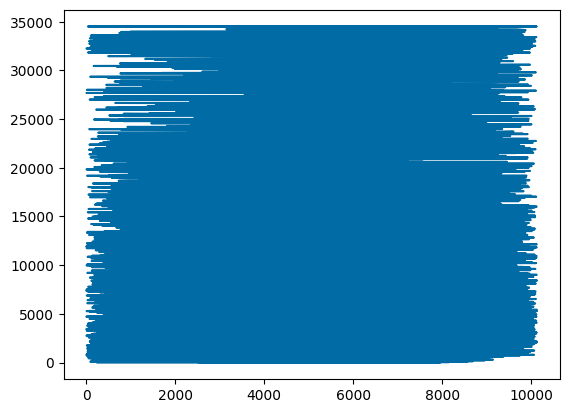

In [165]:
plt.plot(df['Avg_Open_To_Buy'].sort_values())

In [164]:
sorted_values

array([3.0000e+00, 1.0000e+01, 1.4000e+01, ..., 3.4302e+04, 3.4362e+04,
       3.4516e+04])

# Feature Engineering 

# Modeling and Metrics

# Business Insights

# Conclusion